In [61]:
from core.evaluation import IForestEvaluation, LOFEvaluation, get_y, get_y_df
from core.preprocessing import get_dataset
from core.variables import *

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
contamination = 0.01
if_eval = IForestEvaluation(random_state=15)
lof_eval = LOFEvaluation()

X = get_dataset(DATASET_LOCATION, COUNT_ONLY)
y,_ = get_y(X,y_file=Y_DATASET_LOCATION)

if_eval.evaluate(X, y, contamination)
lof_eval.evaluate(X, y, contamination)

2021-05-03 11:24:51,696 — preproc — INFO — Removing the features according to the mode: COUNT_ONLY
2021-05-03 11:24:51,724 — preproc — INFO — Removing the features having variance = 0 ...
2021-05-03 11:24:51,726 — preproc — INFO — The following features were removed: 
total_shots_r, pass_chains_r_count, red_cards_r_count, red_cards_l_count, pass_chains_l_count
2021-05-03 11:24:51,751 — preproc — INFO — Removing the features having high correlation (corr > 0.9) ...
2021-05-03 11:24:51,755 — preproc — INFO — The following features were removed: 
ball_on_side_r (correlates with ball_on_side_l)
possession_r (correlates with possession_l)
fouls_l_count (correlates with free_kicks_r_count)
2021-05-03 11:24:51,788 — eval — INFO —  Starting evaluation: Total count=1000 with contamination=0.0100
2021-05-03 11:25:18,348 — eval — INFO —  Starting evaluation: Total count=1000 with contamination=0.0100


In [4]:
if_eval.log_results()
lof_eval.log_results()

2021-05-03 11:25:20,324 — eval — INFO — Isolation Forest  for t=90 and psi=200:| ROC AUC=0.95022 | PR AUC=0.99963 | SP=0.14286 | F1=0.99244 | FMI=0.98496 | runtime=0.44016s |
2021-05-03 11:25:20,326 — eval — INFO — Isolation Forest  for t=90 and psi=256:| ROC AUC=0.94605 | PR AUC=0.99960 | SP=0.42857 | F1=0.99445 | FMI=0.98893 | runtime=0.32307s |
2021-05-03 11:25:20,327 — eval — INFO — Isolation Forest  for t=90 and psi=300:| ROC AUC=0.94792 | PR AUC=0.99961 | SP=0.28571 | F1=0.99344 | FMI=0.98694 | runtime=0.42111s |
2021-05-03 11:25:20,328 — eval — INFO — Isolation Forest  for t=90 and psi=350:| ROC AUC=0.95483 | PR AUC=0.99966 | SP=0.42857 | F1=0.99445 | FMI=0.98893 | runtime=0.42111s |
2021-05-03 11:25:20,330 — eval — INFO — Isolation Forest  for t=90 and psi=auto:| ROC AUC=0.94605 | PR AUC=0.99960 | SP=0.42857 | F1=0.99445 | FMI=0.98893 | runtime=0.32907s |
2021-05-03 11:25:20,332 — eval — INFO — Isolation Forest  for t=100 and psi=200:| ROC AUC=0.95166 | PR AUC=0.99964 | SP=0.28

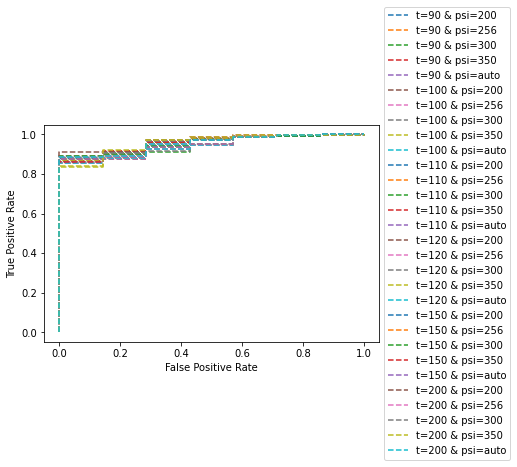

In [5]:
for key in if_eval.get_keys():
    t,psi = key.split("|")
    plt.plot(if_eval.fpr[key], if_eval.tpr[key], linestyle='--', label='t=%s & psi=%s' % (t,psi))

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

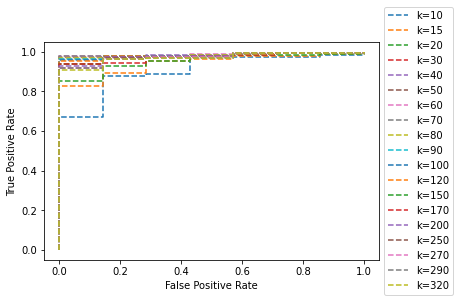

In [6]:
for key in lof_eval.get_keys():
    plt.plot(lof_eval.fpr[key], lof_eval.tpr[key], linestyle='--', label='k=%s' % key)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

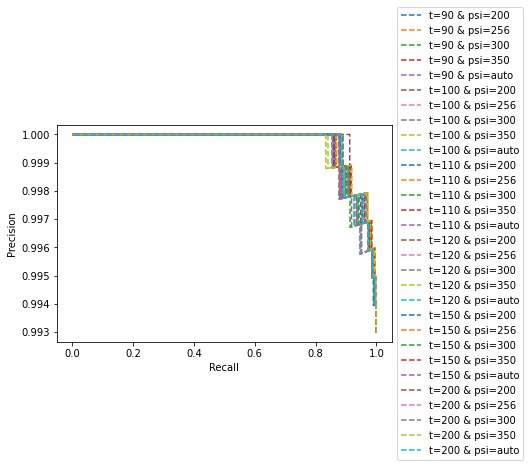

In [7]:
for key in if_eval.get_keys():
    t,psi = key.split("|")
    plt.plot(if_eval.r[key], if_eval.p[key], linestyle='--', label='t=%s & psi=%s' % (t,psi))

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

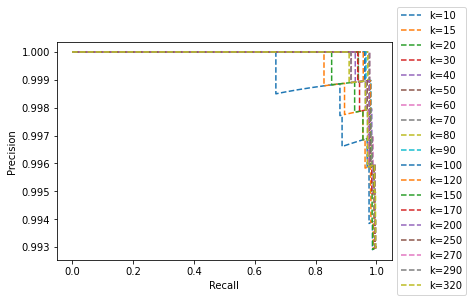

In [8]:
for key in lof_eval.get_keys():
    plt.plot(lof_eval.r[key],           lof_eval.p[key], linestyle='--', label='k=%s' % key)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

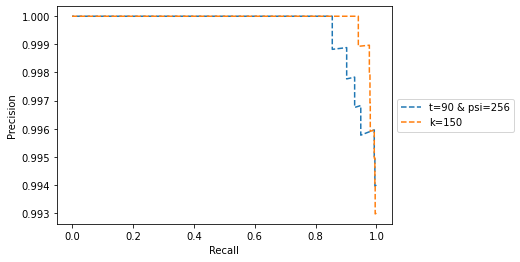

2021-05-03 11:25:23,288 — eval — INFO — Isolation Forest  for t=90 and psi=256:| ROC AUC=0.94605 | PR AUC=0.99960 | SP=0.42857 | F1=0.99445 | FMI=0.98893 | runtime=0.32307s |
2021-05-03 11:25:23,292 — eval — INFO — Local Outlier Factor  for k=150:| ROC AUC=0.98000 | PR AUC=0.99986 | SP=0.42857 | F1=0.99445 | FMI=0.98893 | runtime=0.08500s |


In [9]:
if_fmi_opt_t,if_fmi_opt_psi = if_eval.get_opt_params('fmi')
lof_fmi_opt_k = lof_eval.get_opt_params('fmi')

if_fmi_opt_key = "%s|%s" % (if_fmi_opt_t,if_fmi_opt_psi)

plt.plot(if_eval.r[if_fmi_opt_key], if_eval.p[if_fmi_opt_key], linestyle='--', label='t=%s & psi=%s' % (if_fmi_opt_t,if_fmi_opt_psi))
plt.plot(lof_eval.r[lof_fmi_opt_k], lof_eval.p[lof_fmi_opt_k], linestyle='--', label='k=%s' % (str(lof_fmi_opt_k)))

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

if_eval.log_result(if_fmi_opt_key)
lof_eval.log_result(lof_fmi_opt_k)

<AxesSubplot:>

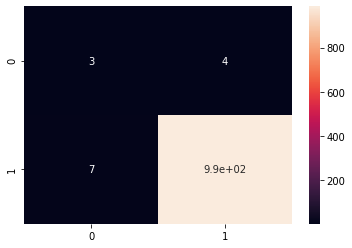

In [10]:
sns.heatmap(if_eval.cm[if_fmi_opt_key], annot=True)

<AxesSubplot:>

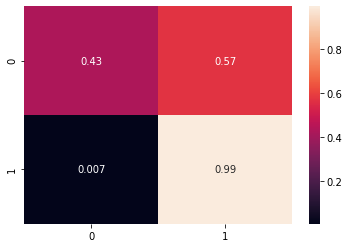

In [11]:
sns.heatmap(if_eval.cm_norm[if_fmi_opt_key], annot=True)

<AxesSubplot:>

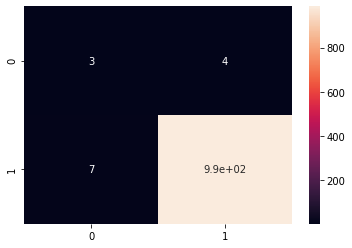

In [12]:
sns.heatmap(lof_eval.cm[lof_fmi_opt_k], annot=True)

<AxesSubplot:>

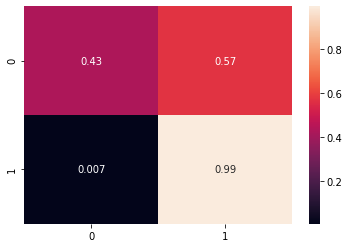

In [13]:
sns.heatmap(lof_eval.cm_norm[lof_fmi_opt_k], annot=True)

In [14]:
if_roc_auc_opt_t,if_roc_auc_opt_psi = if_eval.get_opt_params('roc_auc')
lof_roc_auc_opt_k = lof_eval.get_opt_params('roc_auc')

if_pr_auc_opt_t,if_pr_auc_opt_psi = if_eval.get_opt_params('pr_auc')
lof_pr_auc_opt_k = lof_eval.get_opt_params('pr_auc')

if_f1_opt_t,if_f1_opt_psi = if_eval.get_opt_params('f1')
lof_f1_opt_k = lof_eval.get_opt_params('f1')

if_ap_opt_t,if_ap_opt_psi = if_eval.get_opt_params('ap')
lof_ap_opt_k = lof_eval.get_opt_params('ap')

if_ps_opt_t,if_ps_opt_psi = if_eval.get_opt_params('ps')
lof_ps_opt_k = lof_eval.get_opt_params('ps')

if_rs_opt_t,if_rs_opt_psi = if_eval.get_opt_params('rs')
lof_rs_opt_k = lof_eval.get_opt_params('rs')


if_eval.log_result('%s|%s' % (if_roc_auc_opt_t,if_roc_auc_opt_psi), 'opt roc_auc')
if_eval.log_result('%s|%s' % (if_pr_auc_opt_t,if_pr_auc_opt_psi), 'opt pr_auc')
if_eval.log_result('%s|%s' % (if_ap_opt_t,if_ap_opt_psi), 'opt ap')
if_eval.log_result('%s|%s' % (if_ps_opt_t,if_ps_opt_psi), 'opt ps')
if_eval.log_result('%s|%s' % (if_rs_opt_t,if_rs_opt_psi), 'opt rs')
if_eval.log_result('%s|%s' % (if_fmi_opt_t,if_fmi_opt_psi), 'opt fmi')
if_eval.log_result('%s|%s' % (if_f1_opt_t,if_f1_opt_psi), 'opt f1')

lof_eval.log_result(lof_roc_auc_opt_k, 'opt roc_auc')
lof_eval.log_result(lof_pr_auc_opt_k, 'opt pr_auc')
lof_eval.log_result(lof_ap_opt_k, 'opt_ap')
lof_eval.log_result(lof_ps_opt_k, 'opt_ps')
lof_eval.log_result(lof_rs_opt_k, 'opt_rs')
lof_eval.log_result(lof_fmi_opt_k, 'opt_fmi')
lof_eval.log_result(lof_f1_opt_k, 'opt_f1')

2021-05-03 11:25:24,625 — eval — INFO — Isolation Forest opt roc_auc for t=200 and psi=200:| ROC AUC=0.96475 | PR AUC=0.99974 | SP=0.28571 | F1=0.99344 | FMI=0.98694 | runtime=0.79618s |
2021-05-03 11:25:24,628 — eval — INFO — Isolation Forest opt pr_auc for t=200 and psi=200:| ROC AUC=0.96475 | PR AUC=0.99974 | SP=0.28571 | F1=0.99344 | FMI=0.98694 | runtime=0.79618s |
2021-05-03 11:25:24,632 — eval — INFO — Isolation Forest opt ap for t=90 and psi=256:| ROC AUC=0.94605 | PR AUC=0.99960 | SP=0.42857 | F1=0.99445 | FMI=0.98893 | runtime=0.32307s |
2021-05-03 11:25:24,635 — eval — INFO — Isolation Forest opt ps for t=90 and psi=256:| ROC AUC=0.94605 | PR AUC=0.99960 | SP=0.42857 | F1=0.99445 | FMI=0.98893 | runtime=0.32307s |
2021-05-03 11:25:24,639 — eval — INFO — Isolation Forest opt rs for t=90 and psi=256:| ROC AUC=0.94605 | PR AUC=0.99960 | SP=0.42857 | F1=0.99445 | FMI=0.98893 | runtime=0.32307s |
2021-05-03 11:25:24,642 — eval — INFO — Isolation Forest opt fmi for t=90 and psi=25

In [15]:
if_eval.log_result_latex_table_row('%s|%s' % (if_roc_auc_opt_t,if_roc_auc_opt_psi))
if_eval.log_result_latex_table_row('%s|%s' % (if_pr_auc_opt_t,if_pr_auc_opt_psi))
if_eval.log_result_latex_table_row('%s|%s' % (if_ap_opt_t,if_ap_opt_psi))
if_eval.log_result_latex_table_row('%s|%s' % (if_ps_opt_t,if_ps_opt_psi))
if_eval.log_result_latex_table_row('%s|%s' % (if_rs_opt_t,if_rs_opt_psi))
if_eval.log_result_latex_table_row('%s|%s' % (if_fmi_opt_t,if_fmi_opt_psi))
if_eval.log_result_latex_table_row('%s|%s' % (if_f1_opt_t,if_f1_opt_psi))

lof_eval.log_result_latex_table_row(lof_roc_auc_opt_k)
lof_eval.log_result_latex_table_row(lof_pr_auc_opt_k)
lof_eval.log_result_latex_table_row(lof_ap_opt_k)
lof_eval.log_result_latex_table_row(lof_ps_opt_k)
lof_eval.log_result_latex_table_row(lof_rs_opt_k)
lof_eval.log_result_latex_table_row(lof_fmi_opt_k)
lof_eval.log_result_latex_table_row(lof_f1_opt_k)

$t=200$ | $\psi=200$ & 0.96475 & 0.99974 & 0.28571 & 0.99344 & 0.98694 & 0.79618 \\ 
 \hline
$t=200$ | $\psi=200$ & 0.96475 & 0.99974 & 0.28571 & 0.99344 & 0.98694 & 0.79618 \\ 
 \hline
$t=90$ | $\psi=256$ & 0.94605 & 0.99960 & 0.42857 & 0.99445 & 0.98893 & 0.32307 \\ 
 \hline
$t=90$ | $\psi=256$ & 0.94605 & 0.99960 & 0.42857 & 0.99445 & 0.98893 & 0.32307 \\ 
 \hline
$t=90$ | $\psi=256$ & 0.94605 & 0.99960 & 0.42857 & 0.99445 & 0.98893 & 0.32307 \\ 
 \hline
$t=90$ | $\psi=256$ & 0.94605 & 0.99960 & 0.42857 & 0.99445 & 0.98893 & 0.32307 \\ 
 \hline
$t=90$ | $\psi=256$ & 0.94605 & 0.99960 & 0.42857 & 0.99445 & 0.98893 & 0.32307 \\ 
 \hline
$k=50$ & 0.98633 & 0.99990 & 0.28571 & 0.99344 & 0.98694 & 0.05601 \\ 
 \hline
$k=70$ & 0.98633 & 0.99990 & 0.28571 & 0.99344 & 0.98694 & 0.05901 \\ 
 \hline
$k=150$ & 0.98000 & 0.99986 & 0.42857 & 0.99445 & 0.98893 & 0.08500 \\ 
 \hline
$k=150$ & 0.98000 & 0.99986 & 0.42857 & 0.99445 & 0.98893 & 0.08500 \\ 
 \hline
$k=150$ & 0.98000 & 0.99986 & 0.4285

In [16]:
if_eval.log_results_latex_table_rows()
lof_eval.log_results_latex_table_rows()

$t=90$ | $\psi=200$ & 0.95022 & 0.99963 & 0.14286 & 0.99244 & 0.98496 & 0.44016 \\ 
 \hline
$t=90$ | $\psi=256$ & 0.94605 & 0.99960 & 0.42857 & 0.99445 & 0.98893 & 0.32307 \\ 
 \hline
$t=90$ | $\psi=300$ & 0.94792 & 0.99961 & 0.28571 & 0.99344 & 0.98694 & 0.42111 \\ 
 \hline
$t=90$ | $\psi=350$ & 0.95483 & 0.99966 & 0.42857 & 0.99445 & 0.98893 & 0.42111 \\ 
 \hline
$t=90$ | $\psi=auto$ & 0.94605 & 0.99960 & 0.42857 & 0.99445 & 0.98893 & 0.32907 \\ 
 \hline
$t=100$ | $\psi=200$ & 0.95166 & 0.99964 & 0.28571 & 0.99344 & 0.98694 & 0.48811 \\ 
 \hline
$t=100$ | $\psi=256$ & 0.94519 & 0.99959 & 0.28571 & 0.99344 & 0.98694 & 0.47211 \\ 
 \hline
$t=100$ | $\psi=300$ & 0.95195 & 0.99965 & 0.28571 & 0.99344 & 0.98694 & 0.37709 \\ 
 \hline
$t=100$ | $\psi=350$ & 0.95756 & 0.99969 & 0.42857 & 0.99445 & 0.98893 & 0.41709 \\ 
 \hline
$t=100$ | $\psi=auto$ & 0.94519 & 0.99959 & 0.28571 & 0.99344 & 0.98694 & 0.41709 \\ 
 \hline
$t=110$ | $\psi=200$ & 0.95511 & 0.99967 & 0.28571 & 0.99344 & 0.98694 & 

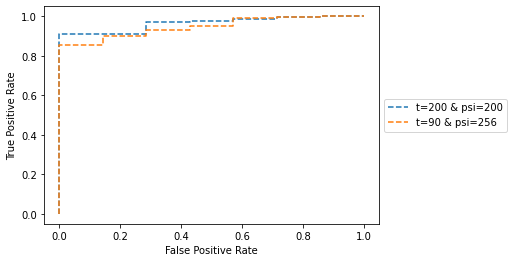

In [17]:
plt.plot(if_eval.fpr['%s|%s' % (if_pr_auc_opt_t,if_pr_auc_opt_psi)], if_eval.tpr['%s|%s' % (if_pr_auc_opt_t,if_pr_auc_opt_psi)], linestyle='--', label='t=%s & psi=%s' % (if_pr_auc_opt_t,if_pr_auc_opt_psi))
plt.plot(if_eval.fpr['%s|%s' % (if_ap_opt_t,if_ap_opt_psi)], if_eval.tpr['%s|%s' % (if_ap_opt_t,if_ap_opt_psi)], linestyle='--', label='t=%s & psi=%s' % (if_ap_opt_t,if_ap_opt_psi))

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

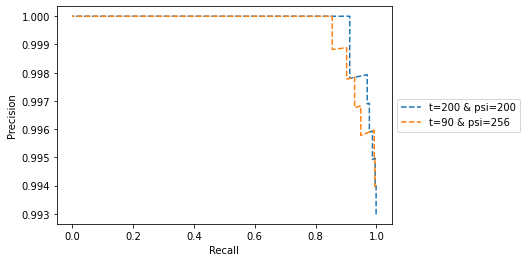

In [18]:

plt.plot(if_eval.r['%s|%s' % (if_pr_auc_opt_t,if_pr_auc_opt_psi)], if_eval.p['%s|%s' % (if_pr_auc_opt_t,if_pr_auc_opt_psi)], linestyle='--', label='t=%s & psi=%s' % (if_pr_auc_opt_t,if_pr_auc_opt_psi))
plt.plot(if_eval.r['%s|%s' % (if_ap_opt_t,if_ap_opt_psi)], if_eval.p['%s|%s' % (if_ap_opt_t,if_ap_opt_psi)], linestyle='--', label='t=%s & psi=%s' % (if_ap_opt_t,if_ap_opt_psi))

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

<AxesSubplot:>

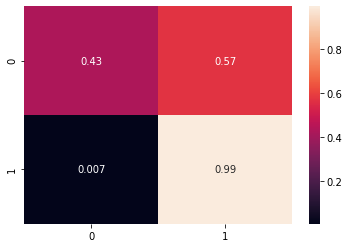

In [19]:
sns.heatmap(if_eval.cm_norm[if_fmi_opt_key], annot=True)

<AxesSubplot:>

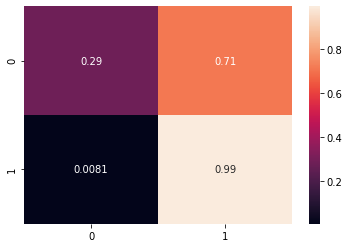

In [20]:
sns.heatmap(if_eval.cm_norm['%s|%s' % (if_pr_auc_opt_t,if_pr_auc_opt_psi)], annot=True)

<AxesSubplot:>

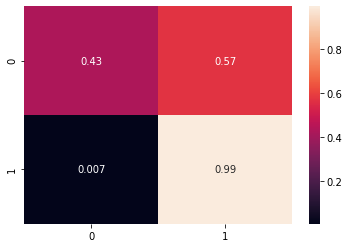

In [21]:
sns.heatmap(lof_eval.cm_norm[150], annot=True)

<AxesSubplot:>

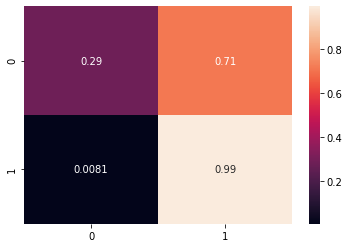

In [22]:
sns.heatmap(lof_eval.cm_norm[50], annot=True)

<AxesSubplot:>

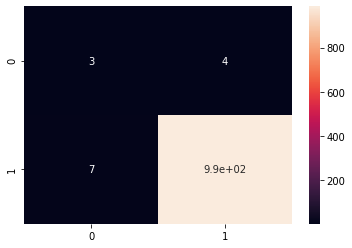

In [23]:
sns.heatmap(lof_eval.cm[150], annot=True)

<AxesSubplot:>

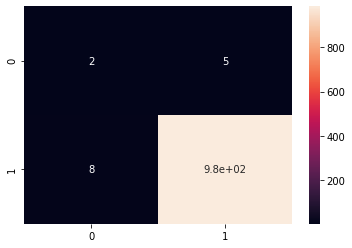

In [24]:
sns.heatmap(lof_eval.cm[50], annot=True)

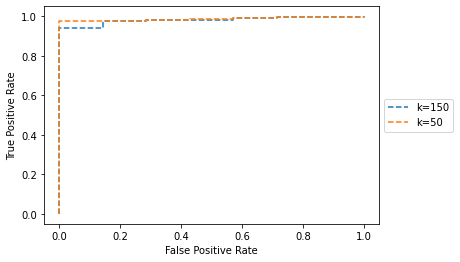

In [25]:
plt.plot(lof_eval.fpr[150], lof_eval.tpr[150], linestyle='--', label='k=%d' % 150)
plt.plot(lof_eval.fpr[50], lof_eval.tpr[50], linestyle='--', label='k=%d' % 50)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


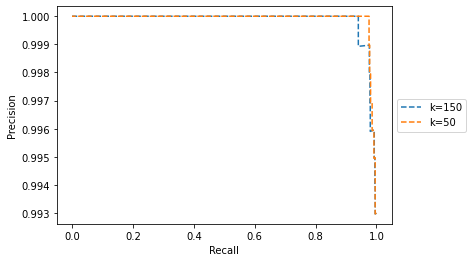

In [26]:
plt.plot(lof_eval.r[150], lof_eval.p[150], linestyle='--', label='k=%d' % 150)
plt.plot(lof_eval.r[50], lof_eval.p[50], linestyle='--', label='k=%d' % 50)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

### Comparison

In [27]:
if_eval.log_result_latex_table_row(if_fmi_opt_key)
lof_eval.log_result_latex_table_row(lof_fmi_opt_k)

$t=90$ | $\psi=256$ & 0.94605 & 0.99960 & 0.42857 & 0.99445 & 0.98893 & 0.32307 \\ 
 \hline
$k=150$ & 0.98000 & 0.99986 & 0.42857 & 0.99445 & 0.98893 & 0.08500 \\ 
 \hline


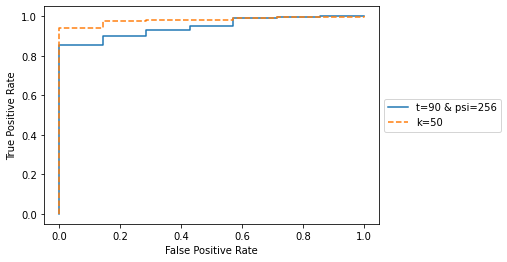

[ 1.19129146e+00  1.91291459e-01  8.15385538e-02  8.15100228e-02
  6.99976191e-02  6.99047103e-02  5.94656623e-02  5.94359324e-02
  4.83022350e-02  4.83007106e-02  7.87526963e-06 -7.79651694e-04
 -5.89612784e-03 -1.66076152e-02 -5.32541896e-02 -7.13314056e-02]
[ 0.03481092 -0.96518908 -1.24451846 -1.24474883 -1.32182184 -1.32999123
 -1.33606998 -1.33708074 -1.33801037 -1.33887091 -1.47165179 -1.47392383
 -1.50207145 -1.50444496 -1.51042757 -1.51129198 -1.87642914]


In [46]:
plt.plot(if_eval.fpr[if_fmi_opt_key], if_eval.tpr[if_fmi_opt_key], label='t=%s & psi=%s' % (if_fmi_opt_t,if_fmi_opt_psi))
plt.plot(lof_eval.fpr[lof_fmi_opt_k], lof_eval.tpr[lof_fmi_opt_k], linestyle='--', label='k=%d' % 50)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

print(if_eval.roc_thresh[if_fmi_opt_key])
print(lof_eval.roc_thresh[lof_fmi_opt_k])

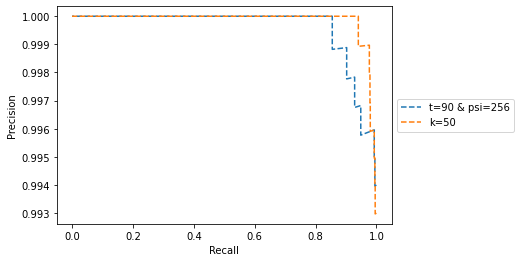

[-5.32541896e-02 -3.75194189e-02 -3.21448594e-02 -3.06401799e-02
 -1.79263500e-02 -1.66076152e-02 -5.89612784e-03 -3.96932725e-03
 -7.79651694e-04  7.87526963e-06  2.96061348e-03  6.17765196e-03
  8.88198568e-03  9.80822514e-03  1.70182854e-02  1.81235630e-02
  1.93764987e-02  2.10902025e-02  2.17135219e-02  2.20328664e-02
  2.31093500e-02  2.34449522e-02  2.42257421e-02  2.54339580e-02
  2.63001685e-02  2.93002711e-02  2.99419983e-02  2.99958843e-02
  3.07690091e-02  3.24889621e-02  3.33634322e-02  3.52662497e-02
  3.53548591e-02  3.55633497e-02  3.57640518e-02  3.65171543e-02
  3.72324510e-02  3.75465230e-02  3.88977485e-02  3.95318411e-02
  4.02706647e-02  4.04078329e-02  4.08255419e-02  4.19567133e-02
  4.20922592e-02  4.24711764e-02  4.30041266e-02  4.32988703e-02
  4.40469490e-02  4.47968280e-02  4.58984510e-02  4.73268461e-02
  4.82930513e-02  4.83007106e-02  4.83022350e-02  4.85895990e-02
  4.86444511e-02  4.89369223e-02  4.93809874e-02  4.97208134e-02
  5.00885831e-02  5.06008

In [47]:
plt.plot(if_eval.r[if_fmi_opt_key], if_eval.p[if_fmi_opt_key], linestyle='--', label='t=%s & psi=%s' % (if_fmi_opt_t,if_fmi_opt_psi))
plt.plot(lof_eval.r[lof_fmi_opt_k], lof_eval.p[lof_fmi_opt_k], linestyle='--', label='k=%d' % 50)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

print(if_eval.pr_thresh[if_fmi_opt_key])
print(lof_eval.pr_thresh[lof_fmi_opt_k])

<AxesSubplot:>

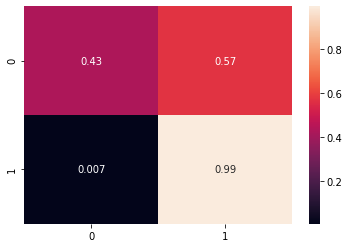

In [32]:
sns.heatmap(if_eval.cm_norm[if_fmi_opt_key], annot=True)

<AxesSubplot:>

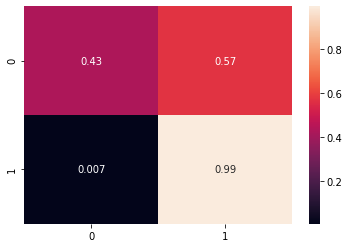

In [33]:
sns.heatmap(lof_eval.cm_norm[lof_fmi_opt_k], annot=True)

<AxesSubplot:>

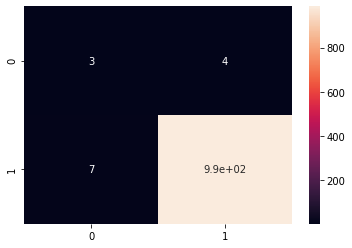

In [34]:
sns.heatmap(if_eval.cm[if_fmi_opt_key], annot=True)

<AxesSubplot:>

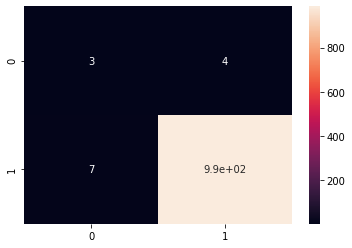

In [35]:
sns.heatmap(lof_eval.cm[lof_fmi_opt_k], annot=True)

In [44]:
print(if_eval.sp[if_fmi_opt_key])
print(if_eval.rs[if_fmi_opt_key])

0.42857142857142855
0.9929506545820745


In [45]:
print(lof_eval.sp[lof_fmi_opt_k])
print(lof_eval.rs[lof_fmi_opt_k])

0.42857142857142855
0.9929506545820745


In [69]:
lof_opt_fmi_outlier_ids = lof_eval.y_pred[lof_fmi_opt_k][lof_eval.y_pred[lof_fmi_opt_k]['outlier'] == -1]['id']
if_opt_fmi_outlier_ids = if_eval.y_pred[if_fmi_opt_key][if_eval.y_pred[if_fmi_opt_key]['outlier'] == -1]['id']
y,_ = get_y_df(X,y_file=Y_DATASET_LOCATION)

true_outlier_ids = y[y['outlier']==-1]['id']

if_found_outliers = np.intersect1d(if_opt_fmi_outlier_ids, true_outlier_ids)
lof_found_outliers = np.intersect1d(lof_opt_fmi_outlier_ids, true_outlier_ids)
found_outliers = np.unique(np.concatenate((if_found_outliers,lof_found_outliers),0))
if_lof_intersect = np.intersect1d(if_opt_fmi_outlier_ids, lof_opt_fmi_outlier_ids)

print('LOF outliers')
print(lof_opt_fmi_outlier_ids.values)
print('IF outlier')
print(if_opt_fmi_outlier_ids.values)
print('true outliers')
print(true_outlier_ids.values)
print('IF outliers INTERSECT true outliers')
print(if_found_outliers)
print('LOF outliers INTERSECT true outliers')
print(lof_found_outliers)
print('(LOF outliers UNION IF outliers) intersect true outliers')
print(found_outliers)
print('LOF outliers INTERSECT IF outliers')
print(if_lof_intersect)

LOF outliers
[100019 100032 100139 100159 100377 100414 100614 100672 100868 100886]
IF outlier
[100005 100019 100023 100032 100159 100414 100672 100704 100726 100868]
true outliers
[100032 100186 100189 100672 100789 100801 100868]
IF outliers INTERSECT true outliers
[100032 100672 100868]
LOF outliers INTERSECT true outliers
[100032 100672 100868]
(LOF outliers UNION IF outliers) intersect true outliers
[100032 100672 100868]
LOF outliers INTERSECT IF outliers
[100019 100032 100159 100414 100672 100868]
